In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your training data
train_dir = "faceImages"  # The directory where cropped face images are stored

# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Size to which each image will be resized

# Data augmentation for training set, validation set will only have rescaling
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Random rotations
    width_shift_range=0.2,  # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Horizontal flipping
    fill_mode='nearest',  # How to fill the pixels after transformations
    validation_split=0.2  # Split data into training and validation sets
)

# Create data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Resize images
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    subset='training'  # Training data
)

# Create data generator for validation data
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    subset='validation'  # Validation data
)


Found 443 images belonging to 3 classes.
Found 109 images belonging to 3 classes.


In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the base model to avoid retraining the VGG16 layers
base_model.trainable = False

# Add a new classification head for our specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use global average pooling to reduce dimensions
x = Dense(1024, activation='relu')(x)  # Add a dense layer for complexity
x = Dense(3, activation='softmax')(x)  # Output layer with 3 classes (Angry, Happy, Sad)

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model architecture
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 32s 1us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,243,075 (58.15 MB)

 Trainable params: 528,387 (2.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [4]:
# Train the model using the generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,  # Number of epochs, adjust based on your dataset and requirements
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Save the trained model
model.save('facial_emotion_model.h5')


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.6612 - loss: 0.8118 - val_accuracy: 0.6354 - val_loss: 0.8184
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6875 - loss: 0.8309 - val_accuracy: 0.6562 - val_loss: 0.8332
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 89s 7s/step - accuracy: 0.6818 - loss: 0.8183 - val_accuracy: 0.6979 - val_loss: 0.8039
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7188 - loss: 0.8402 - val_accuracy: 0.6458 - val_loss: 0.7576
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.6621 - loss: 0.8161 - val_accuracy: 0.6875 - val_loss: 0.7734
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 288ms/step - accuracy: 0.6562 - loss: 0.8115 - val_accuracy: 0.7083 - val_loss: 0.7733
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6358 - loss: 0.8565 - val_accuracy: 0.6667 - val_loss: 0.7819
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 293ms/step - accuracy: 0.7812 - loss: 0.7487 - val_accuracy: 0.7188

In [5]:
# Evaluate the model's performance on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 860ms/step - accuracy: 0.7649 - loss: 0.5977
Validation Loss: 0.6361020803451538, Validation Accuracy: 0.7247706651687622


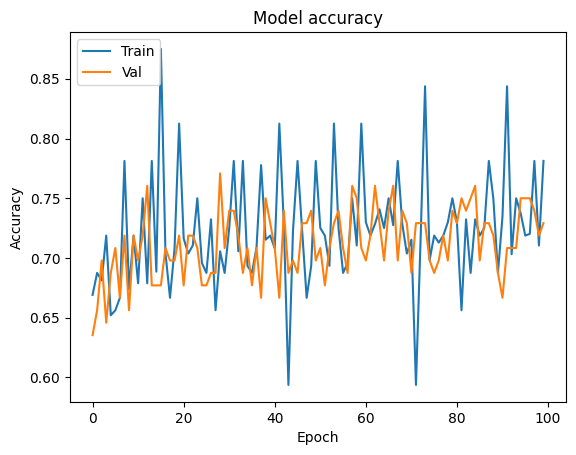

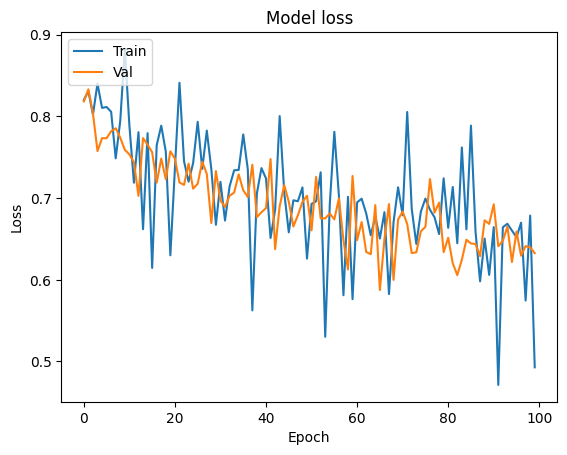

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
